Imports

In [7]:
import torch 
import pandas as pd 
import numpy as np
from PIL import Image
import math
import glob

In [11]:
mask_file = "./UW_madison_dataset/train.csv"
df = pd.read_csv(mask_file)

In [12]:
display(df.head())
len(df)

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


115488

In [13]:
display(df[df['id'] == 'case123_day20_slice_0001'])
display(df[(df['id'] == 'case123_day20_slice_0001') & (df['class'] == 'large_bowel')])

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN


,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN


In [14]:
list(df['id'])[:10], list(df['id'])[::3][:10]

(['case123_day20_slice_0001',
  'case123_day20_slice_0001',
  'case123_day20_slice_0001',
  'case123_day20_slice_0002',
  'case123_day20_slice_0002',
  'case123_day20_slice_0002',
  'case123_day20_slice_0003',
  'case123_day20_slice_0003',
  'case123_day20_slice_0003',
  'case123_day20_slice_0004'],
 ['case123_day20_slice_0001',
  'case123_day20_slice_0002',
  'case123_day20_slice_0003',
  'case123_day20_slice_0004',
  'case123_day20_slice_0005',
  'case123_day20_slice_0006',
  'case123_day20_slice_0007',
  'case123_day20_slice_0008',
  'case123_day20_slice_0009',
  'case123_day20_slice_0010'])

In [15]:
ids = list(df['id'])[::3]
large_bowel = list(df[df['class'] == 'large_bowel']['segmentation'])
small_bowel = list(df[df['class'] == 'small_bowel']['segmentation'])
stomach = list(df[df['class'] == 'stomach']['segmentation'])

In [16]:
data = {
    'id': ids,
    'large_bowel': large_bowel,
    'small_bowel': small_bowel,
    'stomach' : stomach
}

new_df = pd.DataFrame(data)

Remove Nan

In [17]:
have_mask = []
nan_mask = []

for i in range(len(new_df)):
    if pd.isna(new_df.loc[i]['large_bowel']) and pd.isna(new_df.loc[i]['small_bowel']) and pd.isna(new_df.loc[i]['stomach']):
        nan_mask.append(i)
    else:
        have_mask.append(i)

In [18]:
len(nan_mask), len(have_mask)

(21906, 16590)

In [19]:
new_df.loc[have_mask[11]]

id                                      case123_day20_slice_0076
large_bowel    22525 6 22789 9 23055 10 23320 11 23586 11 238...
small_bowel                                                  NaN
stomach        12120 12 12384 16 12648 19 12913 22 13177 25 1...
Name: 75, dtype: object

In [22]:
new_df.drop(nan_mask, inplace=True)

In [23]:
new_df

,id,large_bowel,small_bowel,stomach
64,case123_day20_slice_0065,NaN,NaN,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...
65,case123_day20_slice_0066,NaN,NaN,27561 8 27825 11 28090 13 28355 14 28620 15 28...
66,case123_day20_slice_0067,NaN,NaN,15323 4 15587 8 15852 10 16117 11 16383 12 166...
67,case123_day20_slice_0068,NaN,NaN,14792 5 15056 9 15321 11 15587 11 15852 13 161...
68,case123_day20_slice_0069,NaN,NaN,14526 6 14789 12 15054 14 15319 16 15584 17 15...
...,...,...,...,...
38484,case30_day0_slice_0133,17695 8 17957 23 18213 39 18477 45 18741 52 19...,23337 15 23601 20 23866 23 24131 25 24396 27 2...,NaN
38485,case30_day0_slice_0134,17694 5 17957 10 18215 2 18219 17 18478 32 187...,23336 13 23601 16 23867 18 24132 20 24398 21 2...,NaN
38486,case30_day0_slice_0135,17957 1 18219 10 18482 16 18744 23 19008 43 19...,22540 1 22804 5 23069 7 23334 10 23600 11 2386...,NaN
38487,case30_day0_slice_0136,18746 7 19009 23 19038 7 19273 44 19537 49 198...,23079 1 23343 6 23608 9 23874 11 24139 13 2440...,NaN


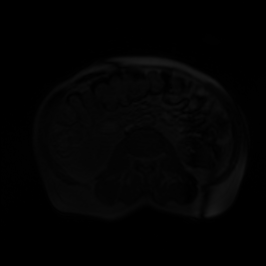

In [116]:
image_path = './UW_madison_dataset/train/case30/case30_day0/scans/slice_0136*.png'
Image.open(glob.glob(image_path)[0])

In [118]:
'case123_day20_slice_0001'.split('_')

['case123', 'day20', 'slice', '0001']

Add Address

In [136]:
adders = []
for i in list(new_df['id']):
    split = i.split('_')
    adder = glob.glob(f'./UW_madison_dataset/train/{split[0]}/{split[0]}_{split[1]}/scans/{split[2]}_{split[3]}*.png')[0]
    adders.append(adder)

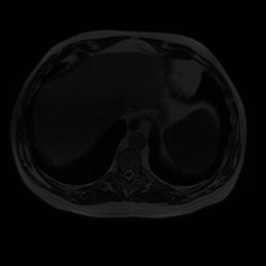

In [138]:
Image.open(adders[0])

In [139]:
new_df['Address'] = adders

In [68]:
mask_file = "./UW_madison_dataset/mask.csv"
mask_df = pd.read_csv(mask_file)

In [85]:
display(mask_df.head())
mask_df.shape

,id,large_bowel,small_bowel,stomach,Address,case,day,slice,weidth,height,counts
0,case123_day20_slice_0065,NaN,NaN,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,./UW_madison_dataset/train/case123/case123_day...,123,20,0065,266,266,1
1,case123_day20_slice_0066,NaN,NaN,27561 8 27825 11 28090 13 28355 14 28620 15 28...,./UW_madison_dataset/train/case123/case123_day...,123,20,0066,266,266,1
2,case123_day20_slice_0067,NaN,NaN,15323 4 15587 8 15852 10 16117 11 16383 12 166...,./UW_madison_dataset/train/case123/case123_day...,123,20,0067,266,266,1
3,case123_day20_slice_0068,NaN,NaN,14792 5 15056 9 15321 11 15587 11 15852 13 161...,./UW_madison_dataset/train/case123/case123_day...,123,20,0068,266,266,1
4,case123_day20_slice_0069,NaN,NaN,14526 6 14789 12 15054 14 15319 16 15584 17 15...,./UW_madison_dataset/train/case123/case123_day...,123,20,0069,266,266,1


(16590, 11)

Add --> Case | Day | Slice| Weidth, Height | Counts

In [84]:
mask_df['case'] = mask_df['id'].apply(lambda x : x.split('_')[0].strip('case'))

mask_df['day'] = mask_df['id'].apply(lambda x : x.split('_')[1].strip('day'))

mask_df['slice'] = mask_df['id'].apply(lambda x : x.split('_')[3])

mask_df['weidth'] = mask_df['Address'].apply(lambda x : int(x.rsplit('_', 4)[1]))

mask_df['height'] = mask_df['Address'].apply(lambda x : int(x.rsplit('_', 4)[2]))

mask_df['counts'] = np.sum(~mask_df.iloc[:, 1:4].isna(), axis=1).values

In [82]:
~mask_df.iloc[:, 1:4].isna()

,large_bowel,small_bowel,stomach
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
16585,True,True,False
16586,True,True,False
16587,True,True,False
16588,True,True,False


In [83]:
np.sum(~mask_df.iloc[:, 1:4].isna(), axis=1).values

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [90]:
display(mask_df.head(-15))
mask_df.shape

,id,large_bowel,small_bowel,stomach,Address,case,day,slice,weidth,height,counts
0,case123_day20_slice_0065,NaN,NaN,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,./UW_madison_dataset/train/case123/case123_day...,123,20,0065,266,266,1
1,case123_day20_slice_0066,NaN,NaN,27561 8 27825 11 28090 13 28355 14 28620 15 28...,./UW_madison_dataset/train/case123/case123_day...,123,20,0066,266,266,1
2,case123_day20_slice_0067,NaN,NaN,15323 4 15587 8 15852 10 16117 11 16383 12 166...,./UW_madison_dataset/train/case123/case123_day...,123,20,0067,266,266,1
3,case123_day20_slice_0068,NaN,NaN,14792 5 15056 9 15321 11 15587 11 15852 13 161...,./UW_madison_dataset/train/case123/case123_day...,123,20,0068,266,266,1
4,case123_day20_slice_0069,NaN,NaN,14526 6 14789 12 15054 14 15319 16 15584 17 15...,./UW_madison_dataset/train/case123/case123_day...,123,20,0069,266,266,1
...,...,...,...,...,...,...,...,...,...,...,...
16570,case30_day0_slice_0118,16925 3 17189 17 17454 21 17720 23 17985 25 18...,20957 4 21220 9 21484 13 21749 15 22014 17 222...,16624 3 16883 17 16903 3 17146 33 17410 37 176...,./UW_madison_dataset/train/case30/case30_day0/...,30,0,0118,266,266,3
16571,case30_day0_slice_0119,17190 16 17454 21 17720 22 17985 25 18251 26 1...,21222 6 21485 11 21750 13 22016 15 22282 16 22...,16883 12 17146 31 17411 36 17675 39 17938 43 1...,./UW_madison_dataset/train/case30/case30_day0/...,30,0,0119,266,266,3
16572,case30_day0_slice_0120,17190 16 17454 21 17720 23 17985 25 18251 26 1...,21488 6 21751 10 22017 12 22282 14 22549 14 22...,16886 8 17147 18 17411 33 17675 37 17939 41 18...,./UW_madison_dataset/train/case30/case30_day0/...,30,0,0120,266,266,3
16573,case30_day0_slice_0121,17191 14 17455 19 17720 23 17985 25 18251 26 1...,21753 7 22017 10 22283 11 22549 12 22814 15 23...,16889 2 17149 13 17413 22 17676 27 17939 33 18...,./UW_madison_dataset/train/case30/case30_day0/...,30,0,0121,266,266,3


(16590, 11)

Split Train Test Validation

In [103]:
root = "./UW_madison_dataset/"

train_cases = open(root+'train.txt', 'r').read().replace('case', '').split('\n')
test_cases = open(root+'test.txt', 'r').read().replace('case', '').split('\n')
validation_cases = open(root+'validation.txt', 'r').read().replace('case', '').split('\n')

In [106]:
train_df = mask_df[mask_df['case'].isin(train_cases)]
test_df = mask_df[mask_df['case'].isin(test_cases)]
valid_df = mask_df[mask_df['case'].isin(validation_cases)]

Save Mask DataFrame

In [92]:
new_df.to_csv("./UW_madison_dataset/mask.csv", index=False)
mask_df.to_csv("./UW_madison_dataset/mask.csv", index=False)

In [107]:
train_df.to_csv("./UW_madison_dataset/train.csv", index=False)
test_df.to_csv("./UW_madison_dataset/test.csv", index=False)
valid_df.to_csv("./UW_madison_dataset/valid.csv", index=False)